# CAD Image Classification Hands-On Session

Welcome to this hands-on session on CAD Image Classification.

In this notebook, you will learn how to build a Image Recognition system using CNN Architecture.

Follow the step-by-step instructions in the code cells below to understand the data preprocessing, prompt, and evaluation.

Note : Please follow the session carefully to understand each part of the workflow.

### Objectives:
1. Import required libraries
3. Data Preprocessing & Visualization
4. Dataset Creation
5. Define the Model
6. Training the Model
7. Evaluation

Let's get started!

# Step 0: Install Libraries, Add Data Zips to the Session Storage & Unzip

**Description**: In this step, we'll install necessary libraries for the session. Then we'll add the data zips to this instance, and then unzip

**Processed Data Link** : https://drive.google.com/file/d/1VEHEqUUGuCECcDwVNnAYEGIc1md70Eay/view?usp=sharing

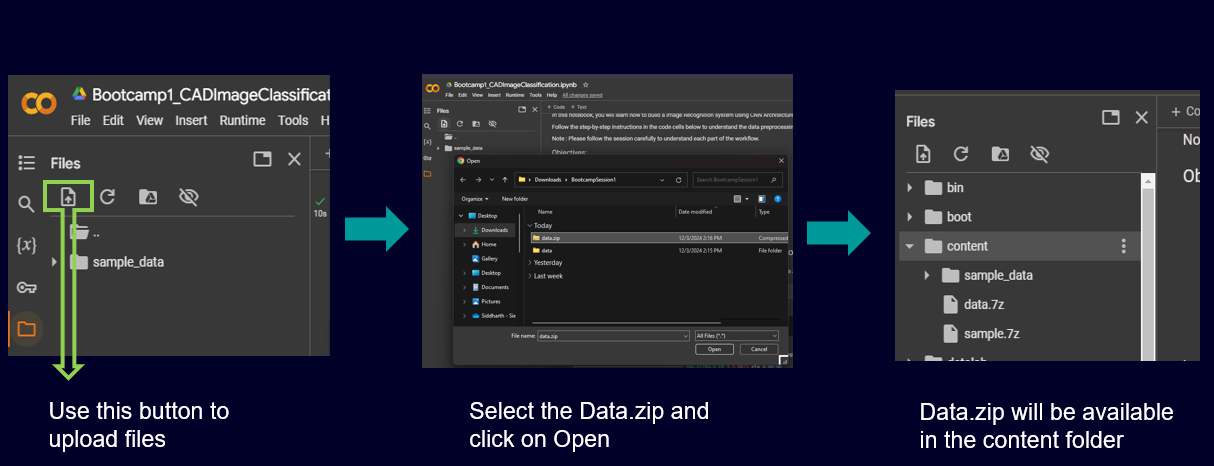

In [ ]:
!pip install trimesh   # CAD Files Processing
!pip install torchinfo # Display Network Details

In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/sample/
   creating: data/sample/bearing/
  inflating: data/sample/bearing/00040187.obj  
  inflating: data/sample/bearing/00040187.png  
  inflating: data/sample/bearing/00047714.obj  
  inflating: data/sample/bearing/00047714.png  
  inflating: data/sample/bearing/00047715.obj  
  inflating: data/sample/bearing/00047715.png  
  inflating: data/sample/bearing/00054573.obj  
  inflating: data/sample/bearing/00054573.png  
  inflating: data/sample/bearing/00054589.obj  
  inflating: data/sample/bearing/00054589.png  
  inflating: data/sample/bearing/00054590.obj  
  inflating: data/sample/bearing/00054590.png  
  inflating: data/sample/bearing/00054595.obj  
  inflating: data/sample/bearing/00054595.png  
  inflating: data/sample/bearing/00054743.obj  
  inflating: data/sample/bearing/00054743.png  
  inflating: data/sample/bearing/00054771.obj  
  inflating: data/sample/bearing/00054771.png  
  inflating: data/sample/bearing/00054819.obj  


## ** After unzipping the content folder should have the following folder structure **
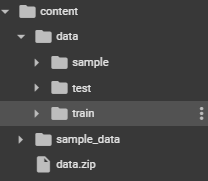

# Step 1: Import Libraries

**Description**: In this step, we will import the necessary libraries required for data manipulation, visualization, deep learning.

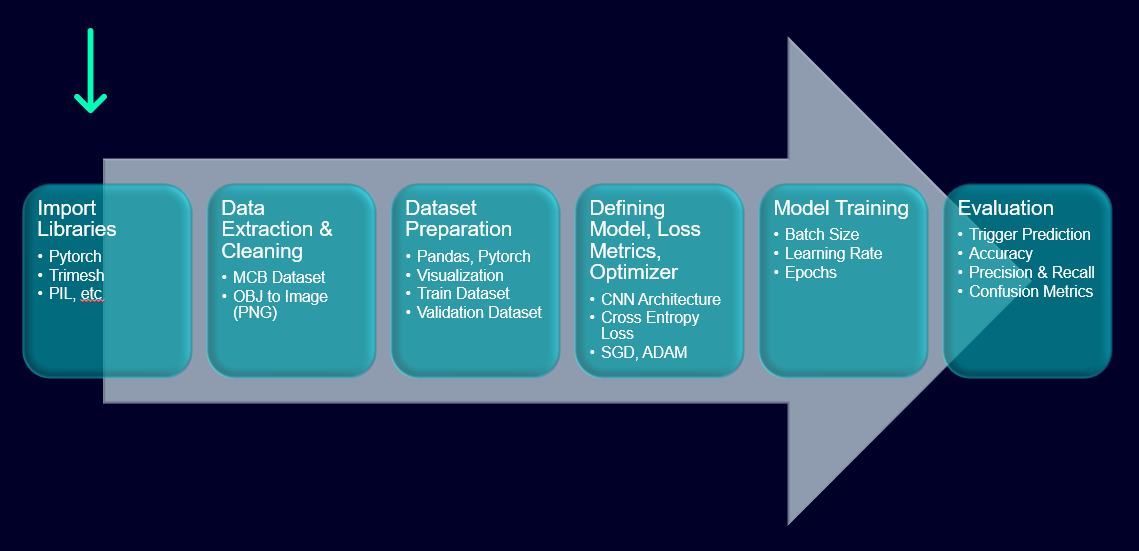

In [ ]:
# Core PyTorch Libraries
import torch                         # Core library for tensors, automatic differentiation, and model building.
import torch.nn as nn                # Contains modules to define and build neural networks (e.g., layers like Linear, Conv2d).
import torch.nn.functional as F      # Functional interface for operations like activation and loss functions.
import torch.optim as optim          # Optimization algorithms like SGD, Adam, RMSprop.
from torch.utils.data import Dataset, DataLoader  # For creating datasets and loading data in batches.

# Computer Vision and Preprocessing
from torchvision import transforms   # Common image transformations for preprocessing input data.
from PIL import Image                # Opening, manipulating, and saving image files.
import numpy as np                   # Numerical operations on arrays, often used for preprocessing data for PyTorch.
import matplotlib.pyplot as plt      # Visualization of data, images, and training metrics.

# 3D Data and Geometry
import trimesh                       # Handling and processing 3D geometric data like meshes.

# Utilities and System Operations
import os                            # Interact with the operating system for file and directory handling.
import random                        # Generate random numbers, useful for data shuffling and augmentation.

# Model Inspection
import torchinfo                     # Displays detailed information about a PyTorch model, such as layer-wise parameters.

# Step 2: Data Extraction & Cleaning [DO NOT RUN THIS]

**Description**: This step has been already done beforehand. The following can be run separately to load OBJ files from the MCB dataset, create an image render (scene) and store it as a PNG file

**ORIGINAL DATASET LINK** : https://engineering.purdue.edu/cdesign/wp/a-large-scale-annotated-mechanical-components-benchmark-for-classification-and-retrieval-tasks-with-deep-neural-networks/

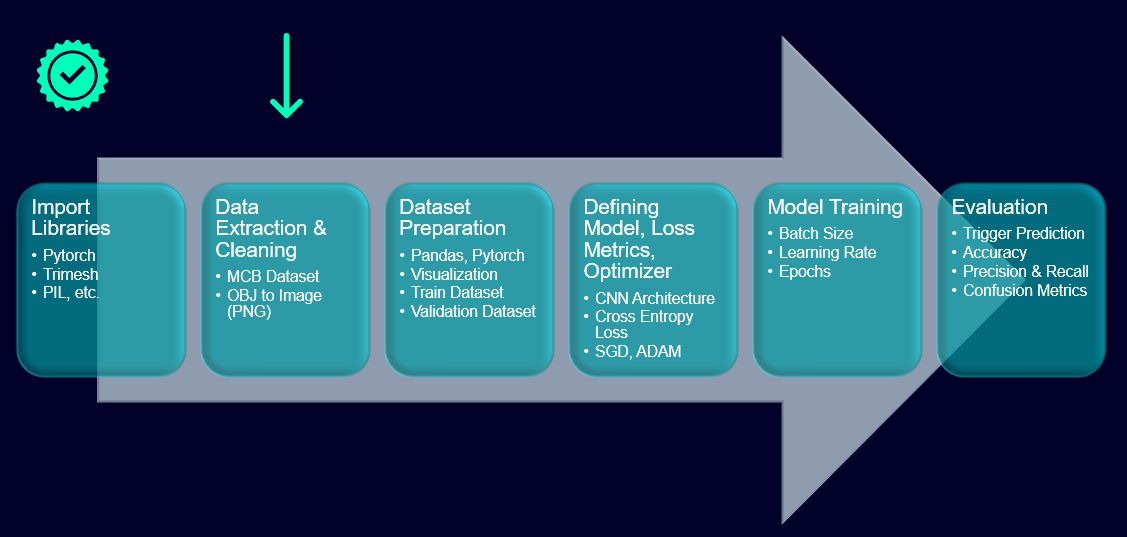

In [ ]:
# import os
# import glob
# import trimesh
# from tqdm import tqdm
# from argparse import ArgumentParser


# def save_image(obj_file, file_path, resolution=[512, 512]):
#     mesh = trimesh.load(obj_file)
#     scene = mesh.scene()

#     png = scene.save_image(visible=True, resolution= resolution)
#     with open(f"{file_path}", "wb") as f:
#         f.write(png)
#         f.close()

# def process_images(data_path, label_list):
#     for label in label_list:
#         obj_path = os.path.join(data_path, label)
#         obj_files = glob.glob(os.path.join(obj_path, "*.obj"))
#         # obj_files = os.listdir(os.path.join(data_path, label))
#         print(f"--> Processing {len(obj_files)} images for {label} class")
#         for obj_file in tqdm(obj_files):
#             try:
#                 obj_file_path = os.path.join(data_path, label, obj_file)
#                 file_name = obj_file.split(".obj")[0]
#                 file_path = os.path.join(os.path.dirname(obj_file_path), file_name)
#                 file_path = file_path + ".png"
#                 if not os.path.exists(file_path):
#                     save_image(obj_file_path, file_path)
#             except Exception as e:
#                 print(f"-----/\------ Error processing {obj_file} : {e}")

#         print(f"<< Finished processing images for {label} class")


# if __name__ == "__main__":
#     args = ArgumentParser()
#     args.add_argument("--data_path", metavar= '-i', type=str, default=r"\path\to\MCB\dataset")
#     args = args.parse_args()

#     data_path = args.data_path

#     train_data_path = os.path.join(data_path, "train")
#     test_data_path = os.path.join(data_path, "test")

#     label_list = os.listdir(train_data_path)
#     print(f"Number of classes: {len(label_list)}")
#     print(label_list)

#     def get_num_samples(train_data_path, label_list):
#         num_samples = {}
#         for label in label_list:
#             num_samples[label] = len(os.listdir(os.path.join(train_data_path, label)))
#         return num_samples

#     num_train_samples = get_num_samples(train_data_path, label_list)
#     print("TRAIN\n",num_train_samples)

#     num_test_samples = get_num_samples(test_data_path, label_list)
#     print("TEST\n",num_test_samples)

#     process_images(train_data_path, label_list)
#     print("Completed processing train images")

#     process_images(test_data_path, label_list)
#     print("Completed processing test images")

# Step 3: Data Preprocessing & Visualization

**Description**: In this step, we will preprocess the data and visualize some samples to understand the dataset better. We'll also look at the distribution of data

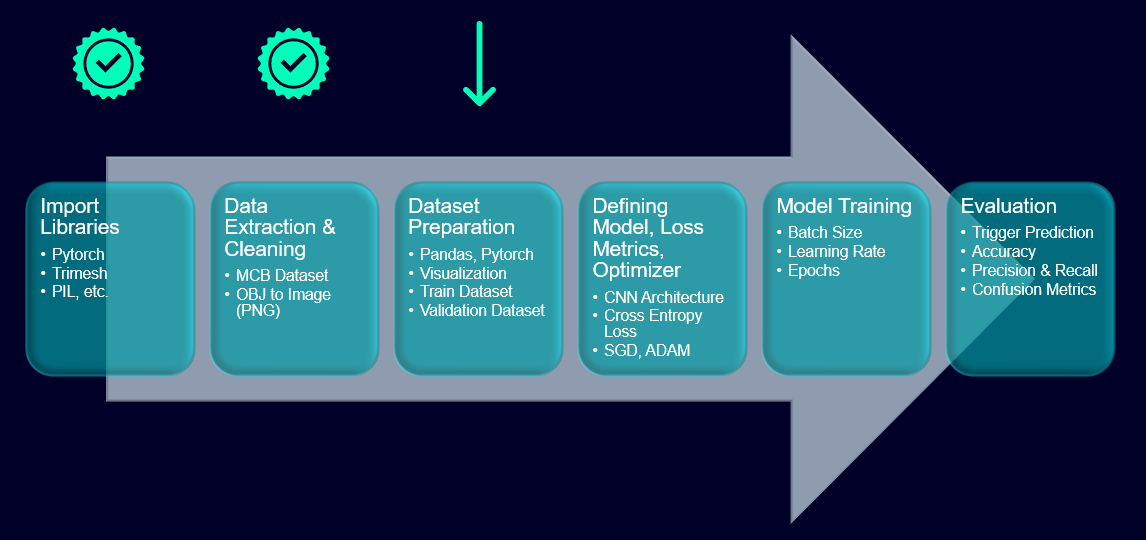

In [ ]:
data_path = r"/content/data"

train_data_path = os.path.join(data_path, "train")
test_data_path = os.path.join(data_path, "test")

label_list = os.listdir(train_data_path)
print(f"Number of classes: {len(label_list)}")
print(label_list)

def get_num_samples(train_data_path, label_list):
    """
    """
    num_samples = {}
    for label in label_list:
        num_samples[label] = len(os.listdir(os.path.join(train_data_path, label)))
    return num_samples

num_train_samples = get_num_samples(train_data_path, label_list)
print("TRAIN\n",num_train_samples)

num_test_samples = get_num_samples(test_data_path, label_list)
print("TEST\n",num_test_samples)

Number of classes: 5
['bushing', 'ring', 'motor', 'bearing', 'gear']
TRAIN
 {'bushing': 471, 'ring': 441, 'motor': 597, 'bearing': 419, 'gear': 412}
TEST
 {'bushing': 118, 'ring': 110, 'motor': 149, 'bearing': 104, 'gear': 102}


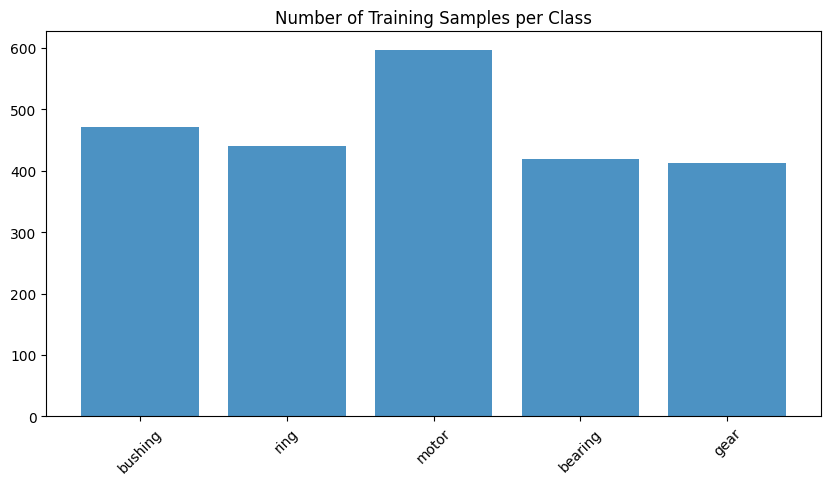

In [ ]:
# Plot of the number of samples per class
plt.figure(figsize=(10,5))
plt.bar(range(len(num_train_samples)), list(num_train_samples.values()), align='center', alpha=0.8)
plt.xticks(range(len(num_train_samples)), list(num_train_samples.keys()), rotation=45)
plt.title("Number of Training Samples per Class")
plt.show()

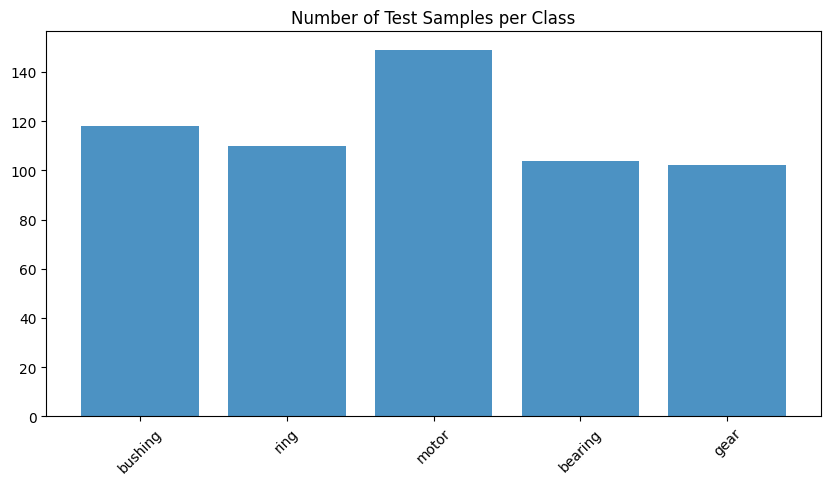

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(len(num_test_samples)), list(num_test_samples.values()), align='center', alpha=0.8)
plt.xticks(range(len(num_test_samples)), list(num_test_samples.keys()), rotation=45)
plt.title("Number of Test Samples per Class")
plt.show()

## Display OBJ files

In [ ]:
obj_file = r"/content/data/sample/gear/00000026.obj"
mesh = trimesh.load(obj_file)
file_name = os.path.basename(obj_file)
print(f"File name: {file_name}")
# scene = mesh.scene()
# png = scene.save_image(visible=True, resolution=[1920, 1080])
# with open(f"{file_name}.png", "wb") as f:
#     f.write(png)
#     f.close()

mesh.show()

File name: 00000026.obj


# Step 4: Pytorch Dataset Creation (In-Memory)

**Description**: In this step, we will create a PyTorch dataset that loads all images into memory. This approach can be useful for smaller datasets where the entire dataset can fit into memory, allowing for faster data access during training.

1. Load the dataset from the specified directory.
2. Apply necessary transformations to the images.
3. Split the dataset into training and testing sets.
4. Create PyTorch DataLoader objects for efficient data loading during training and evaluation.
5. Visualize some samples from the dataset to ensure correctness.

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Root directory of the dataset (e.g., 'train' or 'test').
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.samples = []

        for cls_name in self.classes:
            cls_folder = os.path.join(root_dir, cls_name)
            image_files = [f for f in os.listdir(cls_folder) if f.endswith('.png')]
            # print(f'Class {cls_name} has {len(image_files)} images')
            # cleaned_img_files = [f for f in image_files if not f.endswith('_reject.png')]
            cleaned_img_files = image_files
            print(f'Class {cls_name} has {len(cleaned_img_files)} images')
            for file_name in cleaned_img_files:
                file_path = os.path.join(cls_folder, file_name)
                if os.path.isfile(file_path):
                    self.samples.append((file_path, self.class_to_idx[cls_name]))

    def __len__(self):
        """
        Returns:
            int: Total number of samples in the dataset.
        """
        return len(self.samples)

    def __getitem__(self, idx):
        """
        Args:
            idx (int): Index of the sample to retrieve.
        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")  # Convert to RGB if needed
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test")

print(train_dir, test_dir)

/content/data/train /content/data/test


In [ ]:
print("------------------Train Dataset-------------------------")
train_dataset = ImageDataset(train_dir, transform=None)
print("----------------- Test Dataset------------------------")
test_dataset = ImageDataset(test_dir, transform=None)

------------------Train Dataset-------------------------
Class bearing has 419 images
Class bushing has 471 images
Class gear has 412 images
Class motor has 597 images
Class ring has 441 images
----------------- Test Dataset------------------------
Class bearing has 104 images
Class bushing has 118 images
Class gear has 102 images
Class motor has 149 images
Class ring has 110 images


In [ ]:
train_dataset[0]

(<PIL.Image.Image image mode=RGB size=1920x720>, 0)

In [ ]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

Number of training samples: 2340
Number of test samples: 583


In [ ]:
label_to_idx = train_dataset.class_to_idx
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

print(label_to_idx)
print(idx_to_label)

{'bearing': 0, 'bushing': 1, 'gear': 2, 'motor': 3, 'ring': 4}
{0: 'bearing', 1: 'bushing', 2: 'gear', 3: 'motor', 4: 'ring'}


In [ ]:
def show_random_image(dataset, class_name):
    idx = dataset.class_to_idx[class_name]
    samples = [sample for sample, label in dataset if label == idx]

    if samples:
        random_sample = random.choice(samples)
        plt.imshow(random_sample)
        plt.title(class_name)
        plt.axis('off')
        plt.show()
    else:
        print(f"No samples found for class: {class_name}")

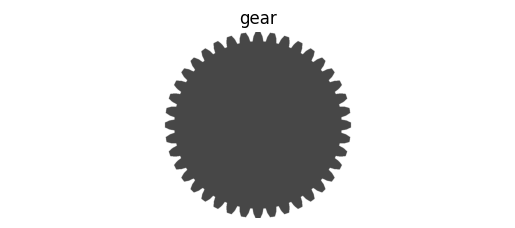

In [ ]:
show_random_image(test_dataset, 'gear')

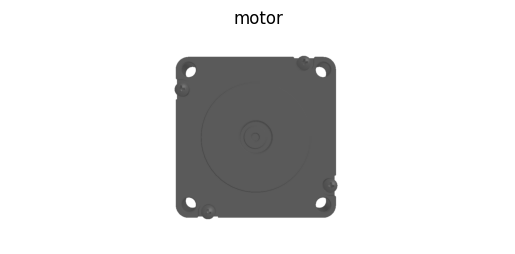

In [ ]:
show_random_image(test_dataset, 'motor')

# Convolutional Neural Network (Basics)

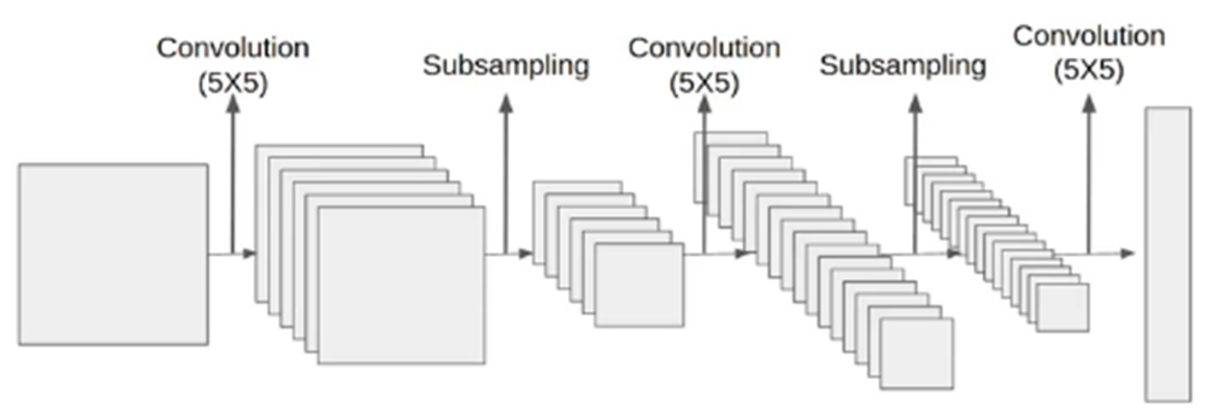

### Simple Convolution Operation
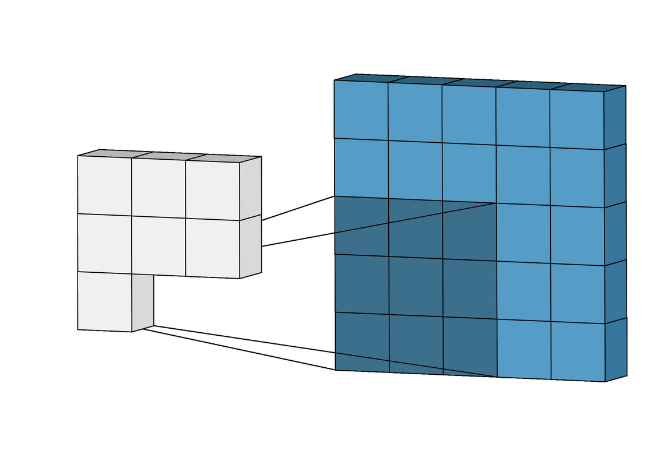
<!-- ![01_SimpleConv.gif](attachment:01_SimpleConv.gif) -->

### Matrix Calculation

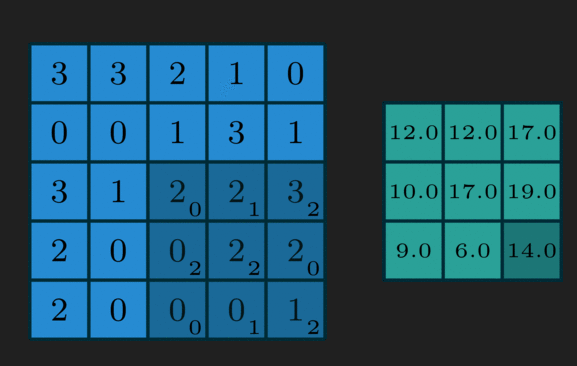

<!-- ![02_MatCal.gif](attachment:02_MatCal.gif) -->

### Padding
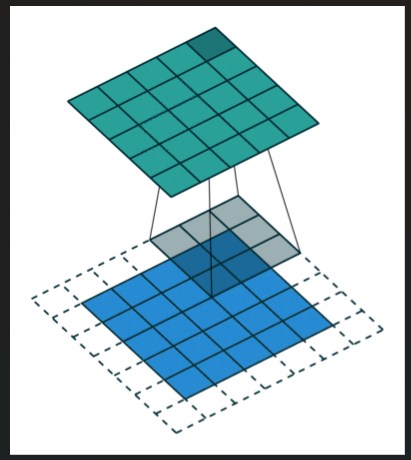
<!-- ![03_Padding.gif](attachment:03_Padding.gif) -->

### Stride
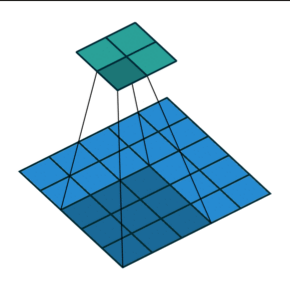
<!-- ![04_Stride.gif](attachment:04_Stride.gif) -->

### Feature Accumulation
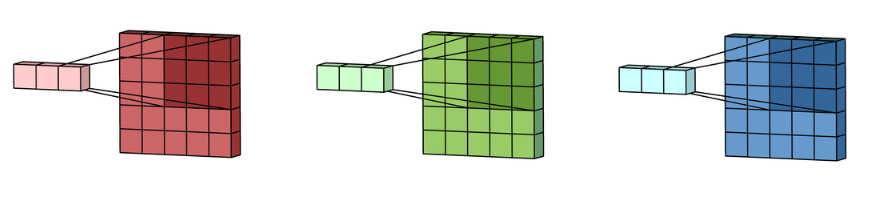
<!-- ![05_FeatAccum.gif](attachment:05_FeatAccum.gif) -->

### Feature Aggregation
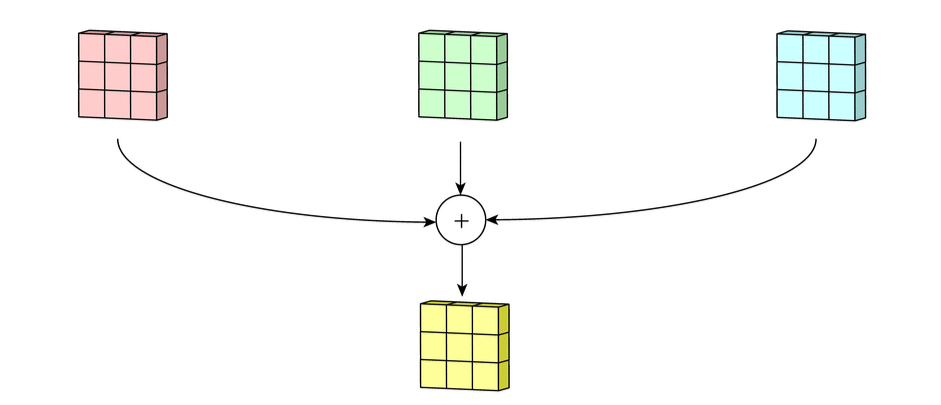

<!-- ![06_FeatAggregate.gif](attachment:06_FeatAggregate.gif) -->

### Max Pooling (2 X 2)
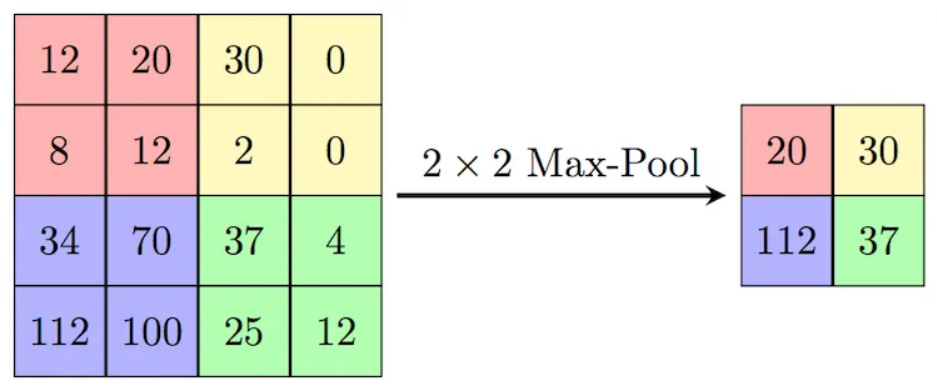
<!-- ![image.png](attachment:image.png) -->

# Step 5: CAD Image Classifier

**Description**: In this step, we'll define the CNN architecture for Image Classification, Loss Function, Optimizer

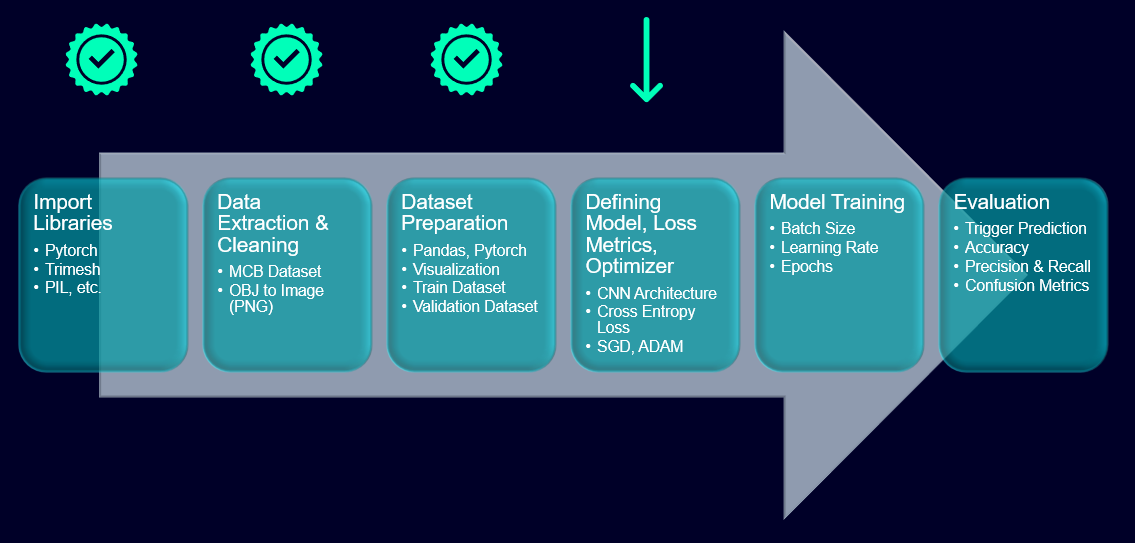

In [ ]:
class CADImageClassifier(nn.Module):
    def __init__(self, num_classes=5):  # Adjust `num_classes` to match the number of output classes in the dataset
        super(CADImageClassifier, self).__init__()

        # First convolutional layer:
        # Input channels = 3 (RGB image), output channels = 6, kernel size = 5x5
        # Stride = 1, Padding = 2 (to preserve input spatial dimensions)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)

        # First pooling layer:
        # Kernel size = 2x2, stride = 2 (reduces spatial dimensions by half)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional layer:
        # Input channels = 6 (output of conv1), output channels = 16, kernel size = 5x5
        # No padding, so spatial dimensions reduce further
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)

        # Second pooling layer:
        # Kernel size = 2x2, stride = 2 (further reduces spatial dimensions by half)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # First fully connected (FC) layer:
        # Input size = 16 * 126 * 126 (calculated based on input size and pooling/convolution operations)
        # Output size = 50
        self.fc1 = nn.Linear(254016, 50)  # Adjust based on input image size

        # Second fully connected layer:
        # Input size = 50 (from fc1), output size = 25
        self.fc2 = nn.Linear(50, 25)

        # Final fully connected layer:
        # Input size = 25 (from fc2), output size = num_classes (e.g., 5 for classification)
        self.fc3 = nn.Linear(25, num_classes)

    def forward(self, x):
        # Apply first convolution followed by ReLU activation and max pooling
        x = self.pool1(F.relu(self.conv1(x)))

        # Apply second convolution followed by ReLU activation and max pooling
        x = self.pool2(F.relu(self.conv2(x)))

        # Flatten the tensor for input to the fully connected layers
        x = torch.flatten(x, 1)  # Flatten from 2D spatial dimensions to a single vector

        # Pass through the first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))

        # Pass through the second fully connected layer with ReLU activation
        x = F.relu(self.fc2(x))

        # Final layer outputs raw scores for each class (logits)
        x = self.fc3(x)
        return x

### Resizing the Images
### Tranformation of PIL Images to Matrices
### Normalizing the values as desired by the Network

In [ ]:
data_transforms = transforms.Compose([
    # Resize:
    # Adjusts the size of the input images to a fixed resolution of 512x512 pixels.
    # This ensures all images have the same dimensions, which is necessary for batch processing in neural networks.
    transforms.Resize((512, 512)),  # Resize to a standard size (512x512) to fit the input resolution

    # Convert to Tensor:
    # Converts the image (usually in PIL format) to a PyTorch tensor.
    # Tensor format is required for compatibility with PyTorch models.
    transforms.ToTensor(),

    # Normalize:
    # Adjusts pixel intensity values to have a mean of 0 and standard deviation of 1.
    # The `[0.5, 0.5, 0.5]` values for mean and std are for the R, G, and B channels respectively.
    # This centers the pixel values around 0 and scales them for stable gradient updates during training.
    # Pixel values are transformed as: `(pixel - mean) / std`
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize each RGB channel to [-1, 1]
])

In [ ]:
train_dataset.transform = data_transforms
test_dataset.transform = data_transforms

In [ ]:
print(f"Input Data Shape: {train_dataset[0][0].shape}, Label : {idx_to_label[train_dataset[0][1]]}")

Input Data Shape: torch.Size([3, 512, 512]), Label : bearing


### LOSS FUNCTION : Cross Entropy Loss =  -SUM (y * LOG (predicted(y)))

In [ ]:
criterion = nn.CrossEntropyLoss()

# Step 6: Model Training

**Description**: In this step, we'll train the model defined above

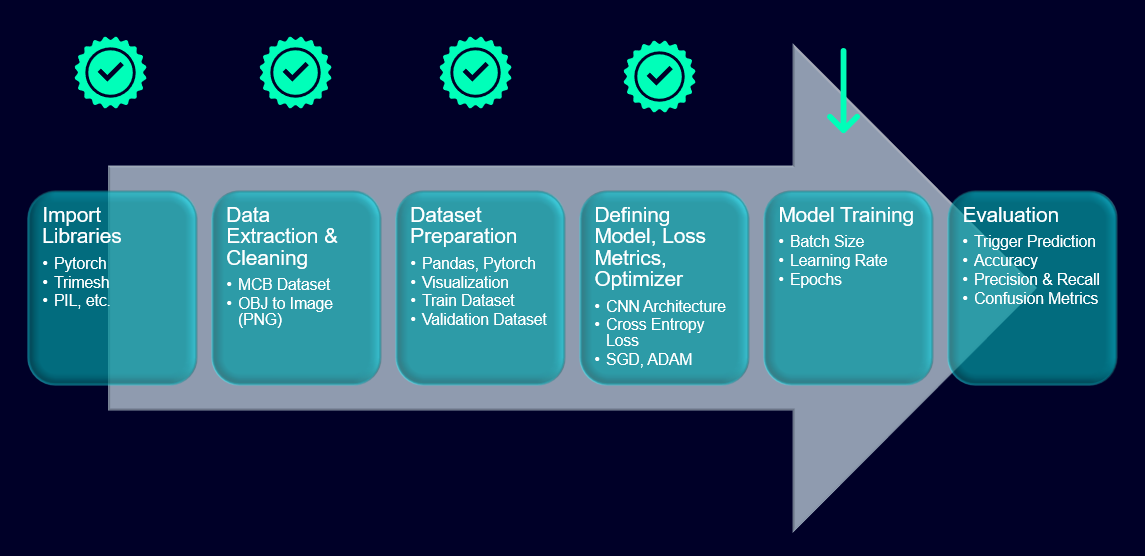

In [ ]:
# Initializing the model
model = CADImageClassifier(num_classes= len(train_dataset.classes))

# Sending the Model to GPU (Cuda) if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device : {device}")
model.to(device)

Device : cuda


CADImageClassifier(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=254016, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=25, bias=True)
  (fc3): Linear(in_features=25, out_features=5, bias=True)
)

In [ ]:
# Number of training epochs:
# Defines how many complete passes through the entire training dataset will be made during training.
# More epochs generally allow the model to learn better, but excessive epochs may lead to overfitting.
num_epochs = 5

# Learning rate:
# Controls the size of the steps the optimizer takes to minimize the loss.
# A small value ensures gradual learning but may require more epochs; a large value can lead to instability.
learning_rate = 0.001

# Batch size:
# Number of training samples processed together before the model's parameters are updated.
# Larger batch sizes use more memory but allow for more stable gradient estimates.
batch_size = 64

# Optimizer:
# Adam optimizer is used to update model weights based on gradients calculated during backpropagation.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def get_loader(dataset, batch_size=32, shuffle=True):
    """
    Creates and returns a DataLoader for the given dataset.

    Args:
        dataset (torch.utils.data.Dataset): The dataset to load data from.
        batch_size (int): Number of samples to process at once. Default is 32.
        shuffle (bool): Whether to shuffle the data at the start of each epoch. Default is True.

    Returns:
        DataLoader: A DataLoader object to manage batches and loading of the dataset.

    Description:
    - A DataLoader is a helper that loads data in manageable chunks (batches) and
      prepares it for the model.
    - It can shuffle the data for better learning and fetches data as needed, saving memory.
    """
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

train_loader = get_loader(train_dataset, batch_size=32, shuffle=True)
test_loader = get_loader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")

Number of training batches: 74
Number of testing batches: 19


In [ ]:
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_epoch_losses, test_epoch_losses = [], []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_epoch_losses.append(float(loss))


    ltrain = np.mean(train_epoch_losses)

    with torch.no_grad():
        model.eval()
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, labels)

            test_epoch_losses.append(float(loss))

        ltest = np.mean(test_epoch_losses)
    print(f"==> Epoch: {epoch+1} | Train Loss: {ltrain:.4f} | Test Loss: {ltest:.4f}")
    train_losses.append(train_epoch_losses)
    test_losses.append(test_epoch_losses)

==> Epoch: 1 | Train Loss: 0.2166 | Test Loss: 0.3754
==> Epoch: 2 | Train Loss: 0.1826 | Test Loss: 0.3911
==> Epoch: 3 | Train Loss: 0.1557 | Test Loss: 0.3833
==> Epoch: 4 | Train Loss: 0.1312 | Test Loss: 0.4319
==> Epoch: 5 | Train Loss: 0.1401 | Test Loss: 0.4267


# Step 7: Evaluation

**Description**: In this step, we'll evaluate the trained CAD Image Classifier

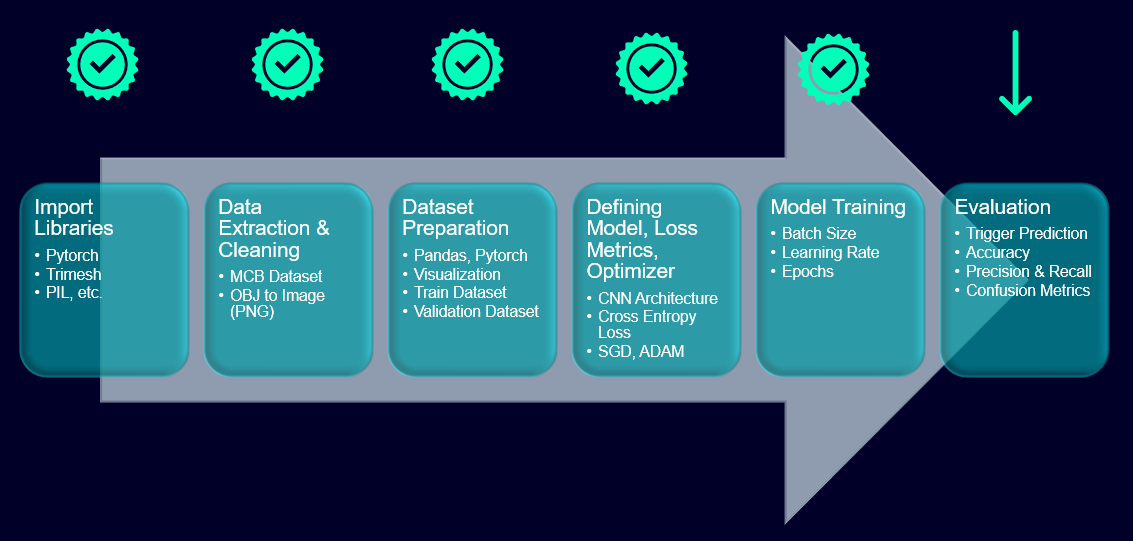

### Loss Curves on Train/Test dataset showing model convergence

Text(0, 0.5, 'Loss')

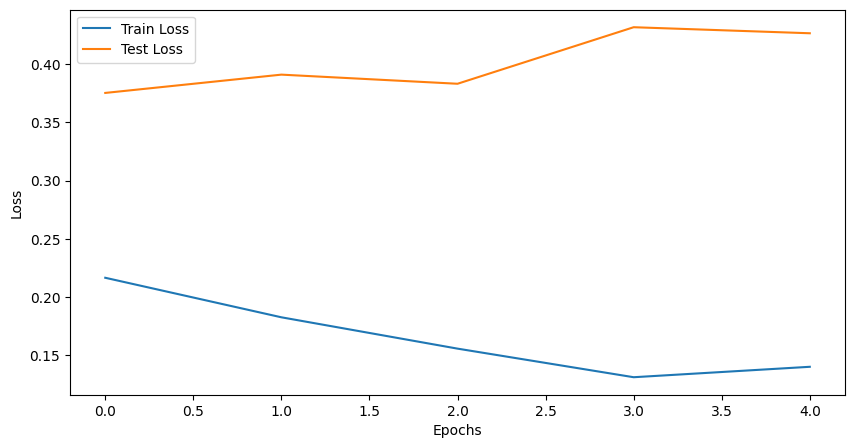

In [ ]:
# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(np.mean(train_losses, axis=1), label='Train Loss')
plt.plot(np.mean(test_losses, axis=1), label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Model Accuracy

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 87.14%


### Confusion Matrix

**Description** : A table that helps us see how well a machine learning model is performing when it tries to classify things into different categories. Think of it as a detailed scorecard for a test.

Here’s how it works:

1. Rows: Represent the actual categories (what the correct answers are).
2. Columns: Represent the predicted categories (what the model guessed).
3. Each cell in the table shows how many times the model made a certain prediction for a certain actual category.

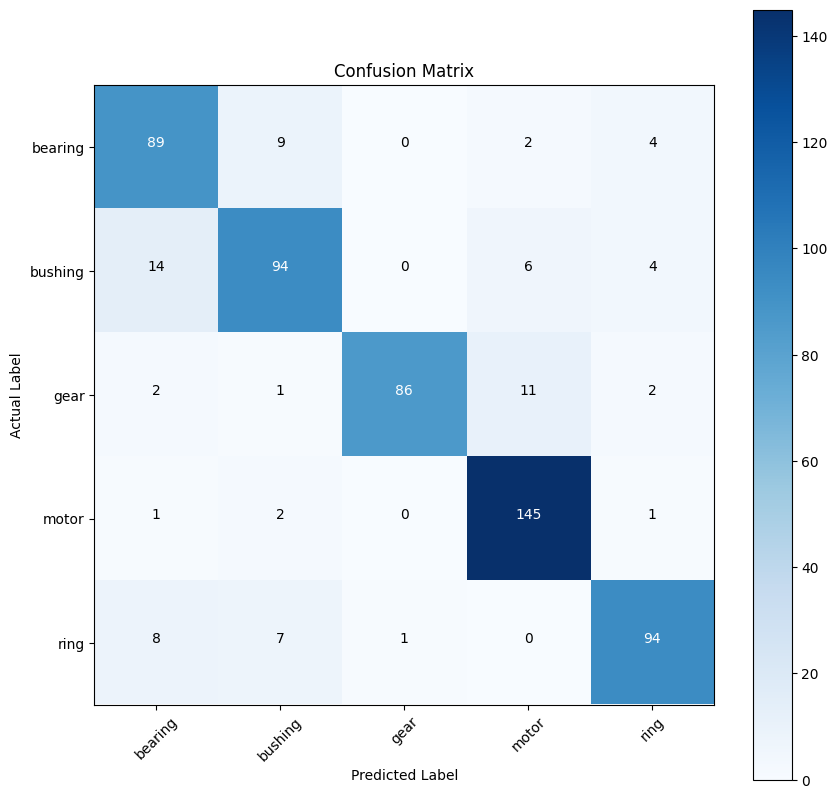

In [ ]:
# Initialize an empty confusion matrix with dimensions based on the number of classes
confusion_matrix = np.zeros((len(test_dataset.classes), len(test_dataset.classes)))

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Get model predictions
        outputs = model(inputs)

        # Find the class index with the highest score
        _, predicted = torch.max(outputs, 1)

        # Update the confusion matrix by counting predictions and true labels
        for i, (p, l) in enumerate(zip(predicted, labels)):
            confusion_matrix[l.item(), p.item()] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

# Add class labels to the x and y axes
tick_marks = np.arange(len(test_dataset.classes))
plt.xticks(tick_marks, test_dataset.classes, rotation=45)
plt.yticks(tick_marks, test_dataset.classes)

# Annotate the confusion matrix with values
for i in range(len(test_dataset.classes)):
    for j in range(len(test_dataset.classes)):
        plt.text(j, i, int(confusion_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > confusion_matrix.max() / 2 else "black")

# Add axis labels
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Display the plot
plt.show()

In [ ]:
def get_class_name(path):
    if 'bearing' in path:
        return 'bearing'
    elif 'bushing' in path:
        return 'bushing'
    elif 'gear' in path:
        return 'gear'
    elif 'motor' in path:
        return 'motor'
    elif 'ring' in path:
        return 'ring'
    else:
        return 'unknown'

def predict_and_plot(model, image_path, transform, device, idx_to_label):
    """
    Takes a PNG file, preprocesses it, gets a prediction from the model, and plots the image with the predicted label.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        image_path (str): Path to the PNG file.
        class_names (list): List of class names corresponding to the model's output.
        device (torch.device): Device (CPU or GPU) to run the prediction on.
    """


    # Open the image and apply the transformations
    image = Image.open(image_path).convert('RGB')  # Ensure it's in RGB format
    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Switch the model to evaluation mode and disable gradients
    model.eval()
    with torch.no_grad():
        # Get model predictions
        outputs = model(input_tensor)
        _, predicted_class = torch.max(outputs, 1)  # Get the class index with the highest score

    # Get the class name for the prediction
    predicted_label = idx_to_label[predicted_class.item()]

    # Plot the image with the predicted label
    plt.imshow(image)
    plt.title(f"ACTUAL LABEL : {get_class_name(image_path)} |||  PREDICTED LABEL : {predicted_label}")
    plt.axis('off')
    plt.show()


### Prediction from Test Dataset

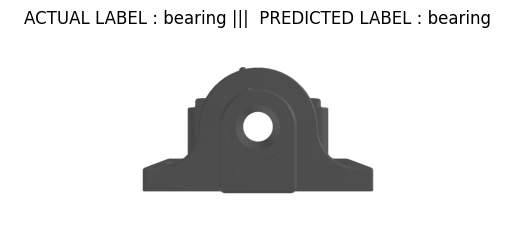

In [ ]:
test_sample_path = r'/content/data/test/bearing/00062948.png'

predict_and_plot(model, test_sample_path, data_transforms, device, idx_to_label)

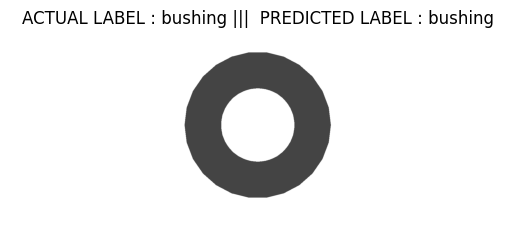

In [ ]:
test_sample_path = r'/content/data/test/bushing/00047494.png'

predict_and_plot(model, test_sample_path, data_transforms, device, idx_to_label)

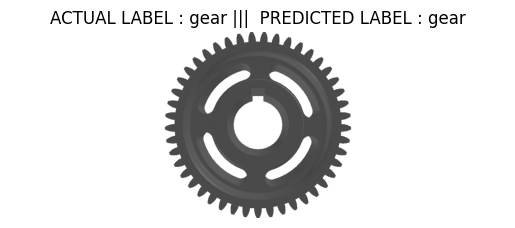

In [ ]:
test_sample_path = r'/content/data/test/gear/00070005.png'

predict_and_plot(model, test_sample_path, data_transforms, device, idx_to_label)

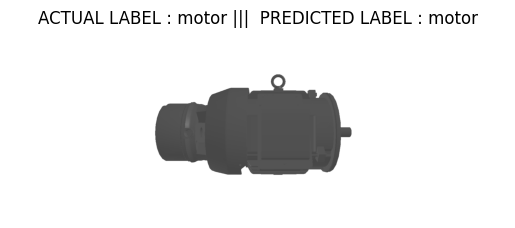

In [ ]:
test_sample_path = r'/content/data/test/motor/00077330.png'

predict_and_plot(model, test_sample_path, data_transforms, device, idx_to_label)

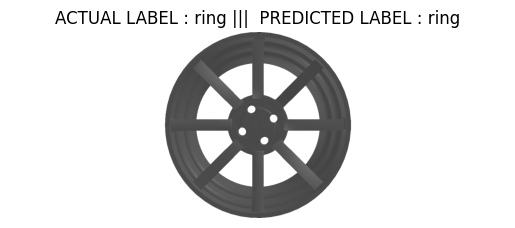

In [ ]:
test_sample_path = r'/content/data/test/ring/00069097.png'

predict_and_plot(model, test_sample_path, data_transforms, device, idx_to_label)